# Credit Card approval Prediction

# Structure

In the post I will go though the following steps:

1. Loading the data.
2. Cleaning it.
3. Preprocessing.
4. Basic data visualization.
5. Modeling: Baseline Logistic Regression
6. Modeling: GridSearchCV Logistic Regression

### Context

Credit score cards are a common risk control method in the financial industry. It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. The bank is able to decide whether to issue a credit card to the applicant. Credit scores can objectively quantify the magnitude of risk.

### Data

<a href="http://archive.ics.uci.edu/ml/datasets/credit+approval">Credit Card Approval dataset</a> from the UCI Machine Learning Repository. The features of this dataset have been anonymized to protect the privacy, even the labels, but they should resemble the *probable features* in a typical credit card application:

- <code>Gender</code>
- <code>Age</code>
- <code>Debt</code>
- <code>Married</code> 
- <code>BankCustomer</code>
- <code>EducationLevel</code> 
- <code>Ethnicity</code>
- <code>YearsEmployed</code> 
- <code>PriorDefault</code> 
- <code>Employed</code>
- <code>CreditScore</code>
- <code>DriversLicense</code> 
- <code>Citizen</code>
- <code>ZipCode</code>
- <code>Income</code>
- <code>ApprovalStatus</code>

### Task

Build a machine learning model to predict the probability of an applicant to get the credit card based on their background.


# 1. Loading the data

In [278]:
import pandas as pd
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

In [279]:
credit = pd.read_csv("datasets/crx.data", header = None)
print(credit.shape)
credit.head(10)

(690, 16)


,0,1,2,3,...,12,13,14,15
0,b,30.83,0.000,u,...,g,00202,0,+
1,a,58.67,4.460,u,...,g,00043,560,+
2,a,24.50,0.500,u,...,g,00280,824,+
3,b,27.83,1.540,u,...,g,00100,3,+
4,b,20.17,5.625,u,...,s,00120,0,+
5,b,32.08,4.000,u,...,g,00360,0,+
6,b,33.17,1.040,u,...,g,00164,31285,+
7,a,22.92,11.585,u,...,g,00080,1349,+
8,b,54.42,0.500,y,...,g,00180,314,+
9,b,42.50,4.915,y,...,g,00052,1442,+


In [280]:
credit.dtypes

0      object
1      object
2     float64
3      object
4      object
5      object
6      object
7     float64
8      object
9      object
10      int64
11     object
12     object
13     object
14      int64
15     object
dtype: object

In [281]:
credit.isnull().values.sum()

0

The dataset is not clean. For example, the column 1 has an object type but the values are numerical. Since we only have 16 columns, we can have a glance of every column to see what we should be looking for in the cleanning phase using a loop. 

The loop prints the first 20 unique elements of every column.

In [282]:
for i in range(0,len(credit.columns)): print(credit[i].unique()[:20])

['b' 'a' '?']
['30.83' '58.67' '24.50' '27.83' '20.17' '32.08' '33.17' '22.92' '54.42'
 '42.50' '22.08' '29.92' '38.25' '48.08' '45.83' '36.67' '28.25' '23.25'
 '21.83' '19.17']
[ 0.     4.46   0.5    1.54   5.625  4.     1.04  11.585  4.915  0.83
  1.835  6.     6.04  10.5    4.415  0.875  5.875  0.25   8.585 11.25 ]
['u' 'y' '?' 'l']
['g' 'p' '?' 'gg']
['w' 'q' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j' '?']
['v' 'h' 'bb' 'ff' 'j' 'z' '?' 'o' 'dd' 'n']
[1.25  3.04  1.5   3.75  1.71  2.5   6.5   0.04  3.96  3.165 2.165 4.335
 1.    5.    0.25  0.96  3.17  0.665 0.75  0.835]
['t' 'f']
['t' 'f']
[ 1  6  0  5  7 10  3 17  2  9  8 15 11 12 40 23  4 20 67 14]
['f' 't']
['g' 's' 'p']
['00202' '00043' '00280' '00100' '00120' '00360' '00164' '00080' '00180'
 '00052' '00128' '00260' '00000' '00320' '00396' '00096' '00200' '00300'
 '00145' '00500']
[    0   560   824     3 31285  1349   314  1442   200  2690   245  1208
  1260    11 10000  5000  4000    35   713   551]
['+' '-']


Apparently, the symbol ? is missing values

# 2. Cleaning the data

In [283]:
# Change column names
column_names = [
"Gender",
"Age",
"Debt",
"Married", 
"BankCustomer",
"EducationLevel", 
"Ethnicity",
"YearsEmployed", 
"PriorDefault", 
"Employed",
"CreditScore",
"DriversLicense", 
"Citizen",
"ZipCode",
"Income",
"ApprovalStatus"]

credit.columns = column_names

In [284]:
# Correct format for missing values
credit = credit.replace("?", np.nan)

In [285]:
# Check categorical and numerical columns have the proper format. Most are categories.
credit.dtypes

Gender             object
Age                object
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
Citizen            object
ZipCode            object
Income              int64
ApprovalStatus     object
dtype: object

In [286]:
# Replace ? with correct label
credit = credit.replace("?", np.nan)
# Missing values by column
print(credit.isnull().sum())
# Total missing values after inputation
print("Total missing values:", credit.isnull().values.sum())

Gender            12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
ApprovalStatus     0
dtype: int64
Total missing values: 67


To fill the rest of the missing data depending on the type of the column we create a "fillnan" function that will fill the "nans" values with the mean of the values of the column if its numerical, and with the most usual value if the column is categorical.

In [287]:
# Only display 8 columns, not the 15.
pd.set_option('display.max_columns', 8)

In [288]:
def fillnans(dataset):
    """
    For every column in the dataset:
    - If it's numerical fill with the mean.
    - If it's categorical fill with the most usual value.
    """
    for i in dataset.columns:
        if dataset[i].dtypes == 'float64':
            dataset.fillna(dataset.mean(), inplace = True)
        if dataset[i].dtypes == 'int64':
            dataset.fillna(dataset.mean(), inplace = True)
        if dataset[i].dtypes == 'object':
            dataset[i].fillna(dataset[i].value_counts().index[0], inplace = True)
    
    return dataset
        

In [289]:
fillnans(credit)

,Gender,Age,Debt,Married,...,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,...,g,00202,0,+
1,a,58.67,4.460,u,...,g,00043,560,+
2,a,24.50,0.500,u,...,g,00280,824,+
3,b,27.83,1.540,u,...,g,00100,3,+
4,b,20.17,5.625,u,...,s,00120,0,+
...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,...,g,00260,0,-
686,a,22.67,0.750,u,...,g,00200,394,-
687,a,25.25,13.500,y,...,g,00200,1,-
688,b,17.92,0.205,u,...,g,00280,750,-


In [290]:
print("Total missing values after fillnans:", credit.isnull().values.sum())

Total missing values after fillnans: 0


# 3. Preprocesing

Most of the algorithms are really picky with transforming your object columns to numerical. I will use sklearn label encoder to "hot encode" the categories: simply label every category (a,b,u,g,v...) in the object columns with a different integer. 


In [291]:
print("Before the preprocessing, the data values looks like this:")
credit.head()

Before the preprocessing, the data values looks like this:


,Gender,Age,Debt,Married,...,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,...,g,00202,0,+
1,a,58.67,4.460,u,...,g,00043,560,+
2,a,24.50,0.500,u,...,g,00280,824,+
3,b,27.83,1.540,u,...,g,00100,3,+
4,b,20.17,5.625,u,...,s,00120,0,+


In [292]:
def objectransform(dataset):
    # Import encoder
    from sklearn import preprocessing
    le = preprocessing.LabelEncoder()
    # Apply encoder to object columns
    for i in dataset.columns:
        if dataset[i].dtypes == 'object':
            dataset[i] = le.fit_transform(dataset[i])
            
    return dataset

In [293]:
objectransform(credit)

,Gender,Age,Debt,Married,...,Citizen,ZipCode,Income,ApprovalStatus
0,1,156,0.000,1,...,0,68,0,0
1,0,328,4.460,1,...,0,11,560,0
2,0,89,0.500,1,...,0,96,824,0
3,1,125,1.540,1,...,0,31,3,0
4,1,43,5.625,1,...,2,37,0,0
...,...,...,...,...,...,...,...,...,...
685,1,52,10.085,2,...,0,90,0,1
686,0,71,0.750,1,...,0,67,394,1
687,0,97,13.500,2,...,0,67,1,1
688,1,20,0.205,1,...,0,96,750,1


After the hot encoding every different category inside every column is transformed to a integer.

# 4. Basic Data Visualization

In [294]:
def heatmap(dataset):
    """
    It assumes that the target is in the last column
    """
    # Features only
    features_corr = dataset.iloc[:,0:-1].corr()
    # Heatmap
    plt.figure(figsize=(16, 6))
    mask = np.triu(np.ones_like(features_corr, dtype=np.bool))
    heatmap = sns.heatmap(features_corr,
                          mask = mask,
                          vmin=-1, vmax=1, 
                          annot=True,
                          cmap='BrBG')
    
    heatmap.set_title('Feature Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


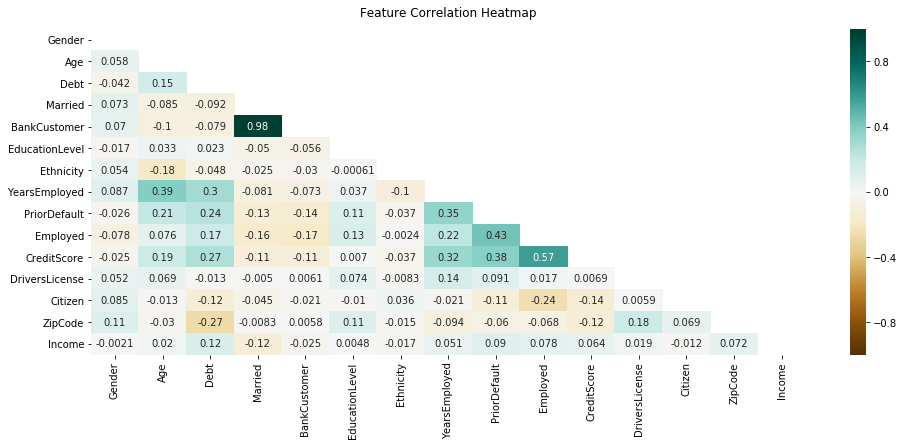

In [295]:
heatmap(credit)

In [296]:
def heatmap_target(dataset):
    """
    It assumes that the target is in the last column
    """
    # Correlation with the target, sorted from more to less correlation
    corr = dataset.corr().iloc[:, -1].sort_values(ascending=False)
    # Correct the shape
    corr = pd.DataFrame(corr).iloc[1:,:]
    # Heatmap ranking
    plt.figure(figsize=(8, 12))

    heatmap = sns.heatmap(corr,
                          vmin=-1, vmax=1, 
                          annot=True,
                          cmap='bwr')
    
    heatmap.set_title('Features Correlation with {}'.format(credit.columns[-1]), 
                      fontdict={'fontsize':12}, pad=12);

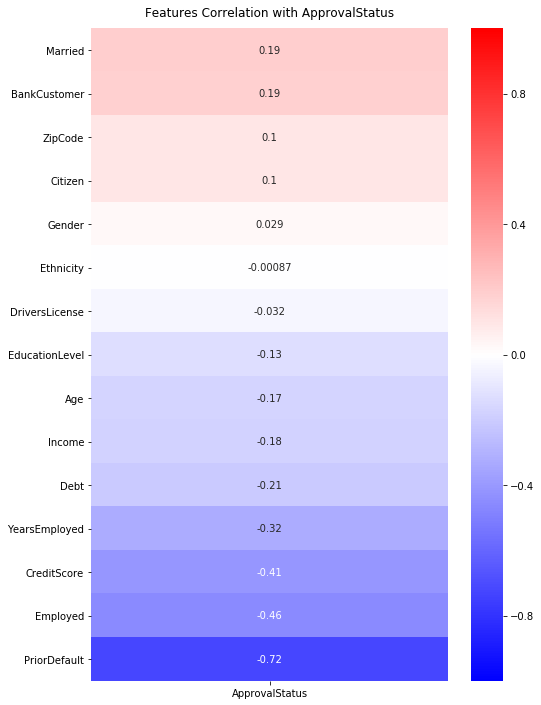

In [297]:
heatmap_target(credit)

# 5. Modeling: Baseline Logistic Regression

We have to change the DataFrames to arrays to be able to run the algorithms. We will use all the 15 features (X) to predict the credit card approval (y).

In [307]:
# Dataframe in values format
credit_values = credit.values
print(credit.shape)
# Columns 0 to 14 are features and 15 the target
X, y = credit_values[:, 0:14], credit_values[:, -1]

(690, 16)


A basiline model has 2 main premises:
    
    1. Should be simple (less likely to overfit). 
    2. Should be interpretable (explainability will help for next models)
    
I will start with a simple linear Logistic Regression model rescaling feaures.

Why I use linear logistic regression?

    1. Our target variable (credit card approval) is binary.
    
    2. Linearity is most of the time the best approximation of the conditional expectation function. 
    
    That is, if there is a relation between the features and the target, it most likely to be linear, and it does a good job predicting the expected value of the target conditional to their features attached. 
    
    For example, the expected credit card approval conditional or being married, being 35 years old and a low credit score.
    
    3. The results are interpretable. For example, using the results we can calculate the how being a bank costumer or your gender increases or decreses your probability or getting a credit card approved. 
    
Why I rescale the features?

    1. Without rescaling, the model does not converge.
    
    2. It makes sense. The features are in different units (years education level, dollars of income, types of gender, credit scores...). With linear rescaling they are under the same range units, in this case 0 to 1.
    

The metric chosen is accuracy, defined as: 
    
$$\text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}$$

Accuracy alone doesn't tell the full story when you're working with a class-imbalanced data set. For example if all the credit card approval were rejected, then predicting always credit card denied would hold a 100% accuracy. However our data is not imbalanced, and have around 56% card application rejected and 44% accepted:

In [308]:
credit["ApprovalStatus"].value_counts()

1    383
0    307
Name: ApprovalStatus, dtype: int64

Baseline regression. We run the first logistic regression scaled, using 2/3 of the labeled data to train the model and testing if it can predict the label of the resting 1/3:

In [309]:
def run_logreg(test_size): 
    # Split into train and test sets
    from sklearn.model_selection import train_test_split
    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size= test_size, 
                                                    random_state= 1234)
    
    
    # Scale the features
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler(feature_range = (0,1))
    X_train_res = scaler.fit_transform(X_train)
    X_test_res = scaler.fit_transform(X_test)

    # Logistic regression
    from sklearn.linear_model import LogisticRegression

    ## Train the model
    logreg = LogisticRegression()
    logreg.fit(X_train_res, y_train)

    ## Test the model
    y_pred = logreg.predict(X_test_res)
    print("Accuracy with {}% of test data".format(round(test_size*100,0)), "=",
          logreg.score(X_test_res, y_test))
    

In [310]:
run_logreg(1/3)

Accuracy with 33.0% of test data = 0.8260869565217391


The algorithm is able to predict the approval or rejection of a credit card applicant only looking at their characteristics with 82.6% accuracy. Of the 228 credit profiles for the model to be tested (2/3 or the total 690 cases), it predicted correctly the approval or rejection 187 cases (82.6% of 228).

We can play around with different proportions of train and test data to explore the case of overfitting (also refered as trade-off between variance and bias):

In [312]:
for test_size in [0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]:
    run_logreg(test_size)

Accuracy with 5.0% of test data = 0.9142857142857143
Accuracy with 10.0% of test data = 0.8840579710144928
Accuracy with 20.0% of test data = 0.8695652173913043
Accuracy with 30.0% of test data = 0.8309178743961353
Accuracy with 40.0% of test data = 0.855072463768116
Accuracy with 50.0% of test data = 0.8405797101449275
Accuracy with 60.0% of test data = 0.8478260869565217
Accuracy with 70.0% of test data = 0.8426501035196687
Accuracy with 80.0% of test data = 0.8351449275362319


In the test above, the logistic regression is 8% more precise splitting 5% of test data and 95% of train data than using 80% of test data and 20% of train data. 

The more the test size, the less train data the algorithm has to being able to "learn" the patterns that lead to the target. Therefore, is less accurate is predicting the feeded data. 

Despite that, the cost of using most of the data to train the model in small datasets like this one is that it overfits the model and it performs worse predicting new data. It learns so well the patterns of the current data that, when you introduce new data with some variations in the features, the algorithm does not know how to classify it well.

We will deal with overfitting with performing a GridSearch that uses a different approach to split the data.

# 6. Modeling: GridSearchCV Logistic Regression 

Instead of seting a fix and unique split between the train and the test sample, the cross validation algorithm will do the split k times, applying the logistic regressions and the accuracy in every split. 

The average accuracy of the k tries will be the 'total' model accuracy.

This method prevents overfitting because there is always a different blind proportion of the data that the algorithm does not use for trainning. Every split, different datapoints for training and test set, introducing feature variations. 

We also will perform a little bit of "tuning" proposing several hyperparameters values that the algorithm can choose from and pick the best ones. 

Visual representation of every split/iteration. The dots are datapoints, and the colors the labels. In the image we can se 4 iteration or splits with the same 1-to-4 proportion of test-to-train (5 dots test, 15 dots train).

![image from wikipedia](crossval.jpg)

In [304]:
def run_logreg(n_splits):
    # Scale the training set
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler(feature_range = (0,1))
    X_res = scaler.fit_transform(X)


    # Params to tune
    params = {
        'tol': [0.01, 0.001, 0.0001],
        'max_iter': [100,150,200],
        'C': [0.001,0.01,0.1,1,10,100,1000]}

    # Grid search CV model
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import GridSearchCV

    # Train model
    grid_logreg = GridSearchCV(estimator = LogisticRegression(), 
                               param_grid = params,
                               cv = n_splits)
    grid_logreg_fit = grid_logreg.fit(X_res, y)

    ## Test model
    best_score  = grid_logreg.best_score_
    best_params = grid_logreg_fit.best_params_

    print("Accuracy with {} splits".format(n_splits), "=", best_score, 
          "using:", best_params )

In [305]:
for n_splits in [2,5,10,20]:
    run_logreg(n_splits)

Accuracy with 2 splits = 0.8565217391304347 using: {'C': 1, 'max_iter': 100, 'tol': 0.01}
Accuracy with 5 splits = 0.8492753623188405 using: {'C': 1, 'max_iter': 100, 'tol': 0.01}
Accuracy with 10 splits = 0.8478260869565217 using: {'C': 0.1, 'max_iter': 100, 'tol': 0.01}
Accuracy with 20 splits = 0.8523949579831933 using: {'C': 1, 'max_iter': 100, 'tol': 0.01}


With cross validation in this small toy-dataset we see that it doesn't really matter how many splits it does, as the algorithm quickly find a pattern to predict the target, but it is usually helpful to explore different split values in more difficult datasets with less features and less clear boundaries between good and bad credit card customers.

Overall we have a model with around 85% accuracy avoiding overfitting. Thanks for reading! Find the link to the notebook below: